# Excplicit Finite Difference Method for the Head Equation in 1D

We consider the following problem:
$$
\left\{
\begin{aligned} 
u_t(x,t) - u_{xx}(x,t) &= f(x,t) \;  &\quad \text{in } (0,1) \times (0,1) \\
u(0,t) = u(1,t) &= 0 \;  &\quad \text{for } t \in (0,1) \\
u(x,0) &= u_0(x) \; &\quad \text{for } x \in (0,1)
\end{aligned}
\right.
$$

To discretize the location, use finite differences of order 2 on a equidistant grid with grid size $h > 0$. Use the explicit Euler method to solve the resulting system of ordinary differential equations.

To test the solution, use the exact solution $u(x,t) = t^3 \sin(\pi x)$.

In [1]:
function heat_1d_fd_explicit(f, u0, dx, dt, tEnd)
    n = convert(Int, 1/dx)
    xvec = collect(range(0, stop=1, length=n+1))
    v = u0.(xvec)
    
    nIterations = round(tEnd / dt)
    r = dt/(dx^2)
    for m = 0:nIterations-1
        vp = copy(v)
        v[1] = 0
        v[end] = 0
        for (i, x) in enumerate(xvec)
            if i == 1 || i == length(xvec)
                continue
            end
            v[i] = r*vp[i+1] + (1-2r)*vp[i] + r*vp[i-1] + dt*f(x, m*dt)
        end
    end
    return v
end

heat_1d_fd_explicit (generic function with 1 method)

In [2]:
f(x,t) = (3t.^2 + pi^2*t.^3) .* sin.(pi*x)

f (generic function with 1 method)

In [3]:
u0(x) = x < 0.5 ? 2x : 2(1-x)

u0 (generic function with 1 method)

In [4]:
u(x,t) = t.^3 .* sin.(pi*x)

u (generic function with 1 method)

In [5]:
function error_max_norm(uex, unum)
    diff = uex - unum
    err = 0.0
    for d in diff
        erri = abs(d)
        if erri > err
            err = erri
        end
    end
    return err
end

error_max_norm (generic function with 1 method)

Let $h = 0.1$ and determine the maximal time step $\Delta t_{\text{max}}$, such that the numerical solution remains stable.

In [6]:
function max_dt_stable(f, u0)
    h = 0.1
    tEnd = 1.0
    dts = [0.0001 0.1]
    eps = 1e-18
    uex = u(0:h:1, tEnd)
    while dts[2] - dts[1] > eps
        dt = (dts[1]+dts[2])/2
        unum = heat_1d_fd_explicit(f, u0, h, dt, tEnd)
        err = error_max_norm(uex, unum)
        if err > 0.1
            dts[2] = dt
        else
            dts[1] = dt
        end
    end
    return (dts[1]+dts[2])/2
end

max_dt_stable (generic function with 1 method)

In [7]:
dt_max = max_dt_stable(f, u0)

0.005146445326753879

Take the fixed time step $\Delta t = 0.5 h^2$. Calculate the numerical solution and the error w.r.t. the maximum norm for $h = 0.1, \, 0.05, \, 0.025$.

In [8]:
h_list = [0.1 0.05 0.025]
dt_list = [0.5*h^2 for h in h_list]
unum_list = [heat_1d_fd_explicit(f, u0, dx, dt, 1.0) for (dx, dt) in zip(h_list, dt_list)]
uex_list = [u.(0:h:1, 1.0) for h in h_list]
error_list = [error_max_norm(uex, unum) for (uex, unum) in zip(uex_list, unum_list)]

1×3 Array{Float64,2}:
 0.00484514  0.00124376  0.000342447

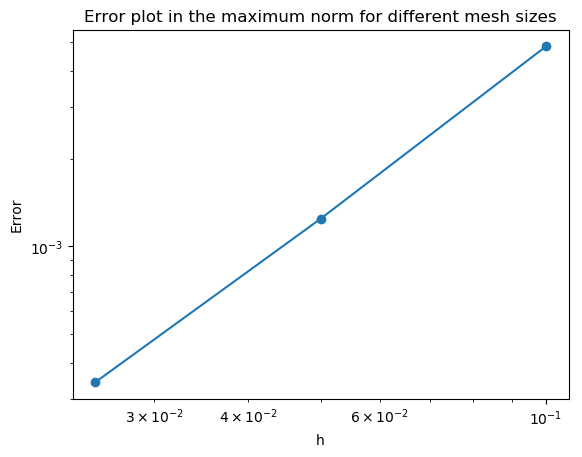

PyObject Text(24.000000000000007, 0.5, 'Error')

In [9]:
using PyPlot
loglog(h_list[:], error_list[:], "-o")
title("Error plot in the maximum norm for different mesh sizes")
xlabel("h")
ylabel("Error")

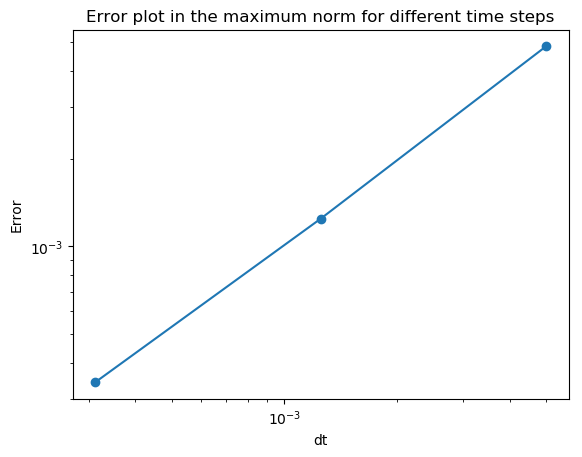

PyObject Text(24.000000000000007, 0.5, 'Error')

In [10]:
loglog(dt_list[:], error_list[:], "-o")
title("Error plot in the maximum norm for different time steps")
xlabel("dt")
ylabel("Error")

Calculate the numerical solution for $h = \frac{1}{50}$, $f(x,t) = 0$ and
$$
u_0(x) = \begin{cases}
2x \; , & x < \frac 1 2 \\
2(1-x) \; , & x \geq \frac 1 2
\end{cases}
\; .
$$
Plot the solution at $t = 0, \, 0.01 , \, 0.05 , \, 0.1 , \, 0.5 , \, 1$.

In [11]:
h = 1/50
dt = 0.5*h^2
f(x,t) = 0
tEnd_list = [0, 0.01, 0.05, 0.1, 0.5, 1.0]
unum_list = [heat_1d_fd_explicit(f, u0, h, dt, tEnd) for tEnd in tEnd_list]

6-element Array{Array{Float64,1},1}:
 [0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36  …  0.36, 0.32, 0.28, 0.24, 0.2, 0.16, 0.12, 0.08, 0.04, 0.0]                                                                                                                  
 [0.0, 0.0399755, 0.0799345, 0.119893, 0.159788, 0.199683, 0.239419, 0.279155, 0.318541, 0.357927  …  0.357927, 0.318541, 0.279155, 0.239419, 0.199683, 0.159788, 0.119893, 0.0799345, 0.0399755, 0.0]                                    
 [0.0, 0.0309069, 0.0615823, 0.0922577, 0.12224, 0.152223, 0.181059, 0.209894, 0.237137, 0.26438  …  0.26438, 0.237137, 0.209894, 0.181059, 0.152223, 0.12224, 0.0922577, 0.0615823, 0.0309069, 0.0]                                      
 [0.0, 0.0189798, 0.03781, 0.0566402, 0.0750242, 0.0934083, 0.111056, 0.128704, 0.145338, 0.161972  …  0.161972, 0.145338, 0.128704, 0.111056, 0.0934083, 0.0750242, 0.0566402, 0.03781, 0.0189798, 0.0]                                  
 [0.0, 0.000365331, 0.0

In [12]:
function plot_numerical_solution(unum, h, dt)
    x = 0:h:1
    ylim((-0.05,1.05))
    plot(x, unum, "+-")
    title("Numerical solution at t = $dt")
    xlabel("x")
    ylabel("u")
end

plot_numerical_solution (generic function with 1 method)

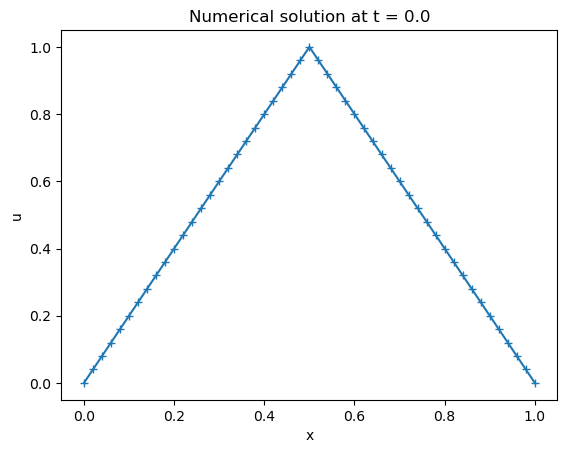

PyObject Text(24.000000000000007, 0.5, 'u')

In [13]:
plot_numerical_solution(unum_list[1], h, tEnd_list[1])

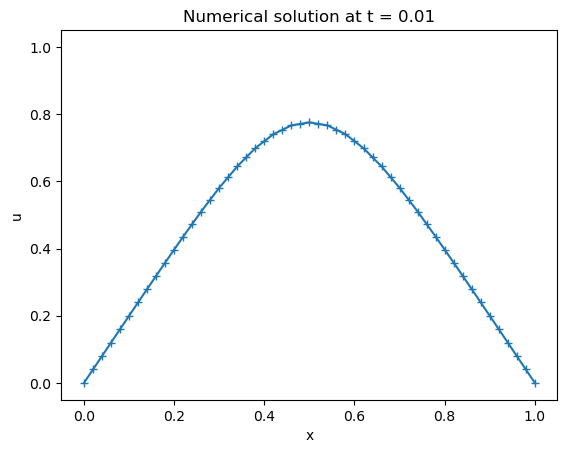

PyObject Text(24.000000000000007, 0.5, 'u')

In [14]:
plot_numerical_solution(unum_list[2], h, tEnd_list[2])

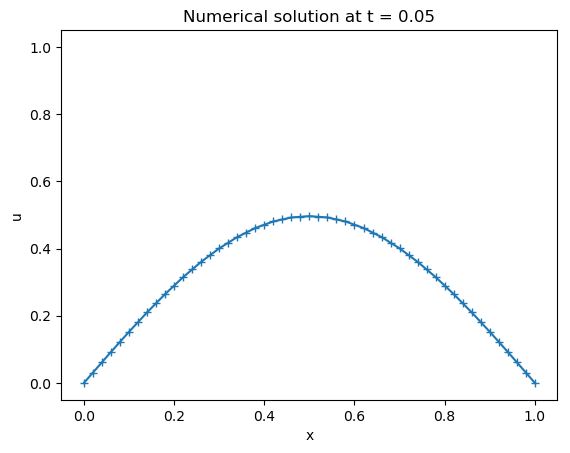

PyObject Text(24.000000000000007, 0.5, 'u')

In [15]:
plot_numerical_solution(unum_list[3], h, tEnd_list[3])

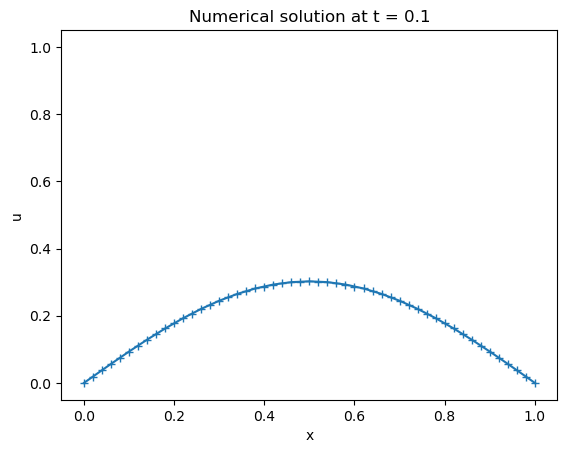

PyObject Text(24.000000000000007, 0.5, 'u')

In [16]:
plot_numerical_solution(unum_list[4], h, tEnd_list[4])

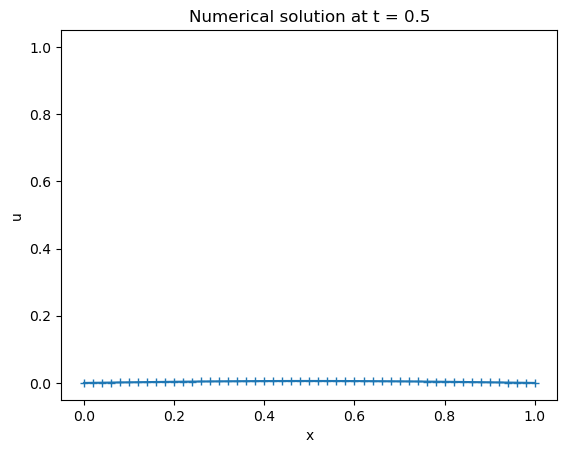

PyObject Text(24.000000000000007, 0.5, 'u')

In [17]:
plot_numerical_solution(unum_list[5], h, tEnd_list[5])

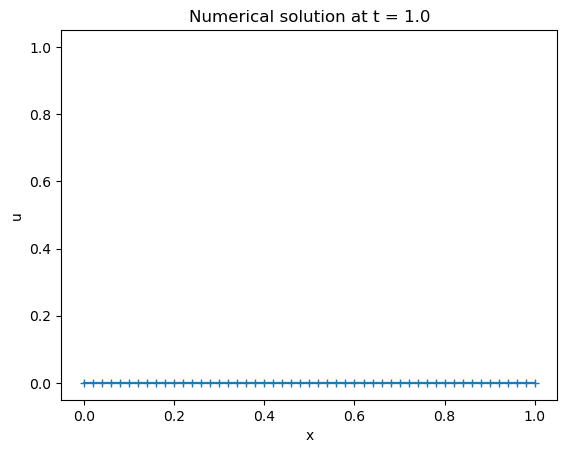

PyObject Text(24.000000000000007, 0.5, 'u')

In [18]:
plot_numerical_solution(unum_list[6], h, tEnd_list[6])